# Best Markets to Advertise in

Our e-learning company offers courses on programming, which most of them are on web and mobile development, but we also cover other domains, like data science, game development, etc.
We want to promote our product and we'd like to invest some money in advertisement, thus the goal of this project is to find out the two best markets to advertise our product in.

# Exploring a Survey Data Set

Since organize surveys for a couple of different markets to find out which would be the best choices for advertisingis very costly, it's a good call to explore cheaper options.

One of them is to use existing data that might be relevant for our purpose. A good candidate is the data from [freeCodeCamp's 2017 New Coder Survey](https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969/). freeCodeCamp is a free e-learning platform that offer courses on web development. Their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

The dataset is about how people are leaning to code and it's available in [this GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey). It seems there isn't a data dictionary about this dataset so we'll explore it to see what we are dealing with.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory = 0)
print(survey.shape)
pd.set_option('display.max_columns', None)
survey.head()

(18175, 136)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

Since our goal is to find the best markets to advertise in, the columns about Code Events, Podcasts and Youtube Channels seem interesting. The questions related to these themes were "If you have attended/listened/watched coding-related events/podcasts/Youtube Channels before, which ones have you found helpful?", respectively.

# Checking for Sample Representativity

Despite these columns might have potential useful information to us, we need to clarify whether the sample data we have is representative for our population of interest and it has the right categories of people for our purpose. The `JobRoleInterest` column describes for every participant the role(s) they would be interested in working. Let's check this out.

In [3]:
survey['JobRoleInterest'].value_counts(normalize=True, dropna=False)*100

NaN                                                                                                                                                                                                                                                   61.529574
Full-Stack Web Developer                                                                                                                                                                                                                               4.528198
  Front-End Web Developer                                                                                                                                                                                                                              2.475928
  Data Scientist                                                                                                                                                                                                                        

Even though there are roughly 60% of missing data in this columns, it's still a good sample to work with, having almost 7000 rows. Thus, let's drop the missing data and follow ahead:

In [4]:
survey['JobRoleInterest'].value_counts(normalize=True) * 100

Full-Stack Web Developer                                                                                                                                                                              11.770595
  Front-End Web Developer                                                                                                                                                                              6.435927
  Data Scientist                                                                                                                                                                                       2.173913
Back-End Web Developer                                                                                                                                                                                 2.030892
  Mobile Developer                                                                                                                                                      

Analyzing the frequency table above, we notice clearly that people can be interested in more than one subject. Let's find the percentage that this happens:

In [5]:
# Droping the rows with NaN in JobRoleInterest column
survey_modified = survey.dropna(subset = ["JobRoleInterest"])
# Calculating the percentage of people that are interested in more than
# one subject
(survey_modified['JobRoleInterest'].str.contains(',').sum() / survey_modified['JobRoleInterest'].shape[0])*100

68.34954233409611

Actually, almost 70% of people are interested in more than one subject. The sample still continues representative, given that we offer courses on various subjects. The fact that new coders have mixed interest might be actually good for us.

Since the focus of our courses is on web and mobile development, let's check how many people are interested in at least one of these two subjects.

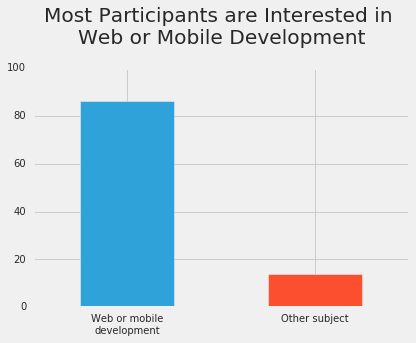

In [6]:
web_mobile = survey['JobRoleInterest'].str.contains('Web Developer|Mobile Developer').value_counts(normalize=True)*100
plt.style.use('fivethirtyeight')

web_mobile.plot.bar()
plt.title('Most Participants are Interested in \nWeb or Mobile Development',
          y = 1.08) # y pads the title upward

plt.xticks([0,1],['Web or mobile\ndevelopment', 'Other subject'],
           rotation = 0) # the initial xtick labels were True and False
plt.ylim([0,100])
plt.show()

It turns out that most people in this survey (roughly 86%) are interested in either web or mobile development. These figures offer us a strong reason to consider this sample representative for our population of interest. We want to advertise our courses to people interested in all sorts of programming niches but mostly web and mobile development.

Now we need to figure out what are the best markets to invest money in for advertising our courses. We'd like to know:
- Where are these new coders located.
- What are the locations with the greatest number of new coders.
- How much money new coders are willing to spend on learning.

# Location and Densities
Let's start with finding out where these new coders are located, and what are the densities (how many coders there are) for each location.

For our analysis, we'll work with the CountryLive column, because we're interest where people actually live at the moment when we run the ads.

Because the data set provides information at a country level, we can think of each country as an individual market. This means we can frame our goal as finding the two best countries to advertise in.

To make sure we're working with a representative sample, we'll drop all the rows where participants didn't answer what role they are interested in. Where a participant didn't respond, we can't know for sure what their interests are, so it's better if we leave out this category of participants.

In [7]:
respondents = survey.dropna(subset=['JobRoleInterest'])
respondents.shape

(6992, 136)

Based on results above, the two markets we'd choose for advertisement are USA (with almost half of the respondents) and India (7.7%), although being the second place but not too far from United Kingdom (4.6%) and Canada (3.8%).

This is useful information, but we need to go more in depth than this and figure out how much money people are actually willing to spend on learning. Advertising in high-density markets where most people are only willing to learn for free is extremely unlikely to be profitable for us.


# Spending Money for Learning

The `MoneyForLearning` column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Our company sells subscriptions at a price of $59 per month, and for this reason we're interested in finding out how much money each student spends per month.

It also seems like a good idea to narrow down our analysis to only four countries: the US, India, the United Kingdom, and Canada. Two reasons for this decision are:
- These are the countries having the highest absolute frequencies in our sample, which means we have a decent amount of data for each.
- Our courses are written in English, and English is an official language in all these four countries. The more people that know English, the better our chances to target the right people with our ads.

It seems the `MonthsProgramming` column describes how many months students had been learning. Let's check this.

In [8]:
respondents['MonthsProgramming'].value_counts().sort_index()

0.0      235
1.0      767
2.0      669
3.0      637
4.0      367
5.0      279
6.0      654
7.0      124
8.0      195
9.0      102
10.0     144
11.0      39
12.0     616
13.0      36
14.0      76
15.0      70
16.0      58
17.0      20
18.0     160
19.0       7
20.0      92
21.0       9
22.0       5
23.0       4
24.0     422
25.0      12
26.0      17
27.0       8
28.0      13
29.0       6
        ... 
73.0       1
75.0       2
80.0       3
83.0       1
84.0      11
86.0       1
89.0       1
96.0       8
100.0      8
105.0      1
108.0      2
111.0      1
113.0      1
120.0     13
124.0      1
144.0      5
156.0      2
171.0      1
180.0      1
190.0      1
198.0      1
200.0      6
240.0      3
264.0      1
300.0      1
360.0      5
370.0      1
408.0      1
480.0      2
744.0      4
Name: MonthsProgramming, Length: 91, dtype: int64

Let's create a column that describes the amount of money a student has spent per month. But first, some students answered that they had been learning to code for 0 months (it might be that they had just started when they completed the survey). To avoid dividing by 0, let's replace all the values of 0 with 1.

In [9]:
# Replacing 0s with 1s
respondents['MonthsProgramming'].replace(0, 1, inplace=True)

# Creating the new column
respondents['Money_per_Month'] = respondents['MoneyForLearning'] / respondents['MonthsProgramming']

# Checking how many missing values we have in the column
respondents['Money_per_Month'].value_counts(dropna=False).head()

/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/core/generic.py:4619: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



 0.000000     3092
NaN            675
 50.000000     128
 25.000000     120
 16.666667     118
Name: Money_per_Month, dtype: int64

There are 675 missing values, we'll keep only the rows that don't have a null value for the new column. Also, we'll remove any rows with missing data in the `CountryLive` column.

In [10]:
# Droping rows with null values in CountryLive and Money_per_Month columns
respondents = respondents.dropna(subset=['CountryLive', 'Money_per_Month'])

countries = ['United States of America', 'India', 'United Kingdom', 'Canada']
countries_mean = respondents.groupby('CountryLive')['Money_per_Month'].mean()
countries_mean[countries]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: Money_per_Month, dtype: float64

The results for the United Kingdom and Canada are surprisingly low relative to the values we see for India. If we considered a few socio-economical metrics (like GDP per capita), we'd intuitively expect people in the UK and Canada to spend more on learning than people in India.

# Dealing with Outliers

The results above might be that we don't have enough representative data for all countries or we have some outliers (maybe coming from wrong survey answers) making the mean too big for India and USA, or too low for the UK and Canada. Or it might be that the results are correct.

We'll generate a box plot for each country to visualize the distribution and identify possible outliers that might are shifting the mean to up or down.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



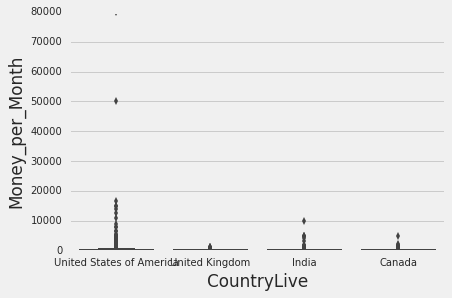

In [11]:
#Creating a DataFrame only with rows about the four countries
top_4 = respondents[respondents['CountryLive'].str.contains(
                    'United States of America|India|United Kingdom|Canada'
                    )]

#Creating the box plots visualizations:
sns.boxplot(x='CountryLive', y='Money_per_Month', data=top_4)
plt.show()

We can clearly see that we have a lot of extreme outliers in every country. It suggests that few people spent much more than the average and it can be shifting the mean up. Let's start eliminating the extreme outliers of USA: two people that spent more than $$50,000. It's not impossible, but very unlikely. Initially, we'll consider only values under $20,000.

(3913, 137)


/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



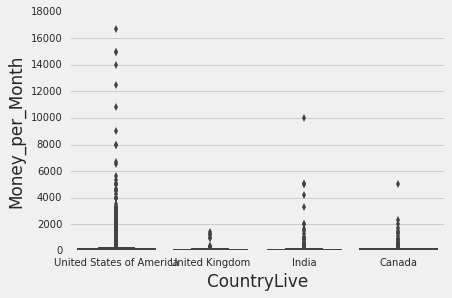

In [12]:
top_4 = top_4[top_4['Money_per_Month'] < 50000]
print(top_4.shape)

sns.boxplot(x='CountryLive', y='Money_per_Month', data=top_4)
plt.show()

It looks like we'll have to eliminate outliers looking by each country individually, since we have a lot of them.

# USA Outliers

Let's analyze the rows which people spent more than $5000 and see if we gather some information about them and possibly eliminate from the data.

In [13]:
mask_u1 = top_4['Money_per_Month'] > 5000
mask_u2 = top_4['CountryLive'] == 'United States of America'
usa_out = top_4[mask_u1 & mask_u2]
usa_out 

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,Money_per_Month
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,architecture or physical engineering,NaN,Employed for wages,NaN,50000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,35.0,796ae14c2acdee36eebc250a252abdaf,d9e44d73057fa5d322a071adc744bf07,44500.0,0.0,0.0,0.0,1.0,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a startup,1.0,"User Experience Designer, Full-Stack Web Dev...",in an office with other developers,English,"single, never married",8000.0,1.0,50dab3f716,2017-03-09 21:26:35,2017-03-09 21:21:58,2017-03-09 21:29:10,2017-03-09 21:26:39,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Architecture,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working and not looking for work,NaN,50000.0,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,50.0,bfabebb4293ac002d26a1397d00c7443,590f0be70e80f1daf5a23eb7f4a72a3d,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a nonprofit,1.0,"Front-End Web Developer, Mobile Developer,...",in an office with other developers,English,"single, never married",13000.0,2.0,e512c4bdd0,2017-03-10 02:14:11,2017-03-10 02:10:07,2017-03-10 02:15:32,2017-03-10 02:14:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

Given all the columns we have, the `AttendedBootcamp` and the `MonthsProgramming` columns seem the ones we'll be based to whether eliminate a row or not. The reason for that is, usually a bootcamp is expensive and it can last a several months. If a person attended a bootcamp and has less or equal than 3 months programming, we'll assume that a high rate `Money_per_Month` is justified by the fact that this learner is still enrolled and just started attending the bootcamp he paid for.

On the otherhand, if a high `Money_per_Month` is registered and the person did not attended a bootcamp, then it's unknown the destination of this money. Despite the survey was directed to "online learning resources", perhaps the person spent with a Master's degree and answered the survey few months before he paid it, similarly to the bootcamp case described. Again, this is just an assumption, we don't know. We'll also eliminate these as well from the dataset.

Resuming, we'll drop rows containing one of the two conditions below combined with a rate `Money_per_Month` bigger than $5,000:
- Not attending a bootcamp;
- Less or equal than three months programming

In [14]:
# Creating a mask to drop No Bootcamp criteria from dataset:
no_bootcamp_us = top_4[(top_4['CountryLive'] == 'United States of America') &
                    (top_4['Money_per_Month'] > 5000) &
                    (top_4['AttendedBootcamp'] == 0)]

# Dropping outliers using the mask above:
top_4 = top_4.drop(no_bootcamp_us.index)

# Creating a mask to drop < 3 months programming criteria from dataset:
less_3_months_us = top_4[(top_4['CountryLive'] == 'United States of America') &
                      (top_4['Money_per_Month'] > 5000) &
                      (top_4['MonthsProgramming'] <= 3)]

# Dropping outliers using the mask above:
top_4 = top_4.drop(less_3_months_us.index)

top_4.shape

(3900, 137)

# Canada Outliers

Looking at the Canada's box plot, we see only one extreme outlier. Let's check this out.

In [15]:
mask_c1 = top_4['Money_per_Month'] > 4000
mask_c2 = top_4['CountryLive'] == 'Canada'
can_out = top_4[mask_c1 & mask_c2]
can_out

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,Money_per_Month
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,30 to 44 minutes,Canada,Canada,finance,NaN,Employed for wages,NaN,60000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,1.0,0.0,0.0,250000.0,10.0,739b584aef0541450c1f713b82025181,28381a455ab25cc2a118d78af44d8749,140000.0,1.0,1.0,0.0,0.0,I haven't decided,1.0,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,work for a multinational corporation,NaN,"Mobile Developer, Full-Stack Web Developer, ...",from home,Yue (Cantonese) Chinese,"single, never married",10000.0,2.0,41c26f2932,2017-03-25 23:23:03,2017-03-25 23:20:33,2017-03-25 23:24:34,2017-03-25 23:23:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,bachelor's degree,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


It seems this person attended a bootcamp and had 2 months programming when he answered the survey. Using the same criteria we did for the USA Outliers, we'll eliminate this row.

In [16]:
# Creating a mask to drop < 3 months programming criteria from dataset:
less_3_months_can = top_4[(top_4['CountryLive'] == 'Canada') &
                      (top_4['Money_per_Month'] > 4000) &
                      (top_4['MonthsProgramming'] <= 3)]

# Dropping outliers using the mask above:
top_4 = top_4.drop(less_3_months_can.index)

top_4.shape

(3899, 137)

# India Outliers

There are few extreme outliers in India distribution and it seems starting at >$2,500/month. Let's check this out.

In [17]:
mask_i1 = top_4['Money_per_Month'] > 2500
mask_i2 = top_4['CountryLive'] == 'India'
ind_out = top_4[mask_i1 & mask_i2]
ind_out

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,Money_per_Month
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,A stay-at-home parent or homemaker,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,30.0,d964ec629fd6d85a5bf27f7339f4fa6d,950a8cf9cef1ae6a15da470e572b1b7a,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,work for a startup,1.0,"User Experience Designer, Mobile Developer...",in an office with other developers,Bengali,"single, never married",20000.0,4.0,38d312a990,2017-03-10 10:22:34,2017-03-10 10:17:42,2017-03-10 10:24:38,2017-03-10 10:22:40,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,bachelor's degree,Computer Programming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,Not working and not looking for work,NaN,100000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,10.0,811bf953ef546460f5436fcf2baa532d,81e2a4cab0543e14746c4a20ffdae17c,NaN,0.0,0.0,0.0,NaN,I haven't decided,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,work for a multinational corporation,1.0,"Information Security, Full-Stack Web Developer...",no preference,Hindi,"single, never married",50000.0,15.0,4611a76b60,2017-03-10 10:48:31,2017-03-10 10:42:29,2017-03-10 10:51:37,2017-03-10 10:48:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,bachelor's degree,Computer Science,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,Na

It seems that neither participant attended a bootcamp. Also, 3 people have been programming for more than 3 months. Overall, it's really hard to figure out from the data whether these persons really spent that much money with learning. As we said before, they might have misunderstood and thought university tuition is included. It seems safer to remove these rows.

In [18]:
# Creating a mask to drop < 3 months programming criteria from dataset:
no_bootcamp_ind = top_4[(top_4['CountryLive'] == 'India') &
                      (top_4['Money_per_Month'] > 2500) &
                      (top_4['AttendedBootcamp'] == 0)]

# Dropping outliers using the mask above:
top_4 = top_4.drop(no_bootcamp_ind.index)

top_4.shape

(3893, 137)

Let's recompute the mean values and generate the final box plots.

In [19]:
countries_new_mean = top_4.groupby('CountryLive')['Money_per_Month'].mean()
countries_new_mean[countries]

CountryLive
United States of America    138.982678
India                        65.758763
United Kingdom               45.534443
Canada                       93.065400
Name: Money_per_Month, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



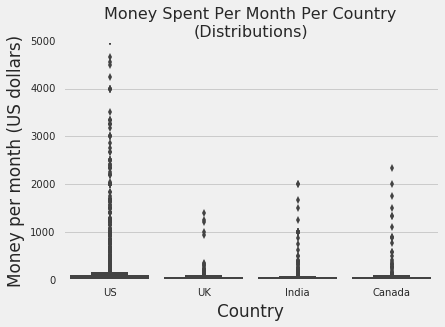

In [20]:
# Visualize the distributions again
sns.boxplot(y = 'Money_per_Month', x = 'CountryLive',
            data = top_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
          fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

# Choosing the Two Best Markets

Obviously, one country we should advertise in is the US. Lots of new coders live there and they are willing to pay a good amount of money each month (roughly \$139).

We sell subscriptions at a price of \$59 per month, and Canada seems to be the best second choice because people there are willing to pay roughly \$93 per month, compared to India (\$66) and the United Kingdom (\$45).

The data suggests strongly that we shouldn't advertise in the UK, but let's take a second look at India before deciding to choose Canada as our second best choice:

$59 doesn't seem like an expensive sum for people in India since they spend on average \$66 each month.
We have almost twice as more potential customers in India than we have in Canada:

In [21]:
# Frequency table for the 'CountryLive' column
top_4['CountryLive'].value_counts(normalize = True) * 100

United States of America    74.955048
India                       11.739019
United Kingdom               7.166709
Canada                       6.139224
Name: CountryLive, dtype: float64

So it's not crystal clear what to choose between Canada and India. Although it seems more tempting to choose Canada, there are good chances that India might actually be a better choice because of the large number of potential customers.

At this point, it seems that we have several options:

1. Advertise in the US, India, and Canada by splitting the advertisement budget in various combinations:
    - 60% for the US, 25% for India, 15% for Canada.
    - 50% for the US, 30% for India, 20% for Canada; etc.

2. Advertise only in the US and India, or the US and Canada. Again, it makes sense to split the advertisement budget unequally. For instance:
    - 70% for the US, and 30% for India.
    - 65% for the US, and 35% for Canada; etc.

3. Advertise only in the US.

At this point, it's probably best to send our analysis to the marketing team and let them use their domain knowledge to decide. They might want to do some extra surveys in India and Canada and then get back to us for analyzing the new survey data.

# Conclusion

In this project, we analyzed survey data from new coders to find the best two markets to advertise in. The only solid conclusion we reached is that the US would be a good market to advertise in.

For the second best market, it wasn't clear-cut what to choose between India and Canada. We decided to send the results to the marketing team so they can use their domain knowledge to take the best decision.